<a href="https://colab.research.google.com/github/waghpallavi/Netflix-movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix movies and TV shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1-** Chetan Prakash
##### **Team Member 2-** Pallavi Wagh

# **Project Summary -**

This project's goal is to do a cluster analysis on a Netflix dataset in order to identify trends and group items that are similar together. Information on films, actors, directors, genres, and countries was included in the collection.

The project took a methodical approach to cluster analysis:

1. **Data Preprocessing:** To manage missing values, eliminate irrelevant columns, and convert category variables into numerical representations, the dataset was cleaned and preprocessed. Text data was also processed by eliminating stopwords and tokenizing them.
2. **Feature Extraction:** Term Frequency-Inverse Document Frequency (TF-IDF) was used to vectorize text data in order to turn textual information into numerical characteristics that could be utilised for clustering.
3. **Dimensionality Reduction:** To minimise the dimensionality of the feature space while keeping significant information, Principal Component Analysis (PCA) was used. This stage aided in successfully visualising and grouping the data.
4. **Clustering Algorithm Selection:** We explored a number of clustering techniques, including K-means and agglomerative clustering. Using assessment measures including the Davies-Bouldin Score, Calinski-Harabasz Score, and Silhouette Score, the total number of clusters was calculated. The best clustering method hyperparameters were discovered using GridSearchCV.
5. **Cluster Visualization:** Scatter plots, word clouds, and 3D plots were used to visualise the clusters. These visualisations aided in comprehending the clusters' properties and distributions.
6. **Evaluation:** The quality of the clusters was evaluated using evaluation measures such the silhouette score, Calinski-Harabasz score, and Davies-Bouldin score. These measures gave us information about the clusters' separation, compactness, and similarity.

Netflix's cluster project yielded valuable insights into its dataset, uncovering hidden patterns and grouping similar items. The analysis enabled personalized recommendations, targeted marketing, and content classification. Further refinement and exploration of algorithms, parameters, and features are needed to improve clustering performance and provide a foundation for data-driven decision making in the entertainment industry.

# **GitHub Link -**

# **Problem Statement**


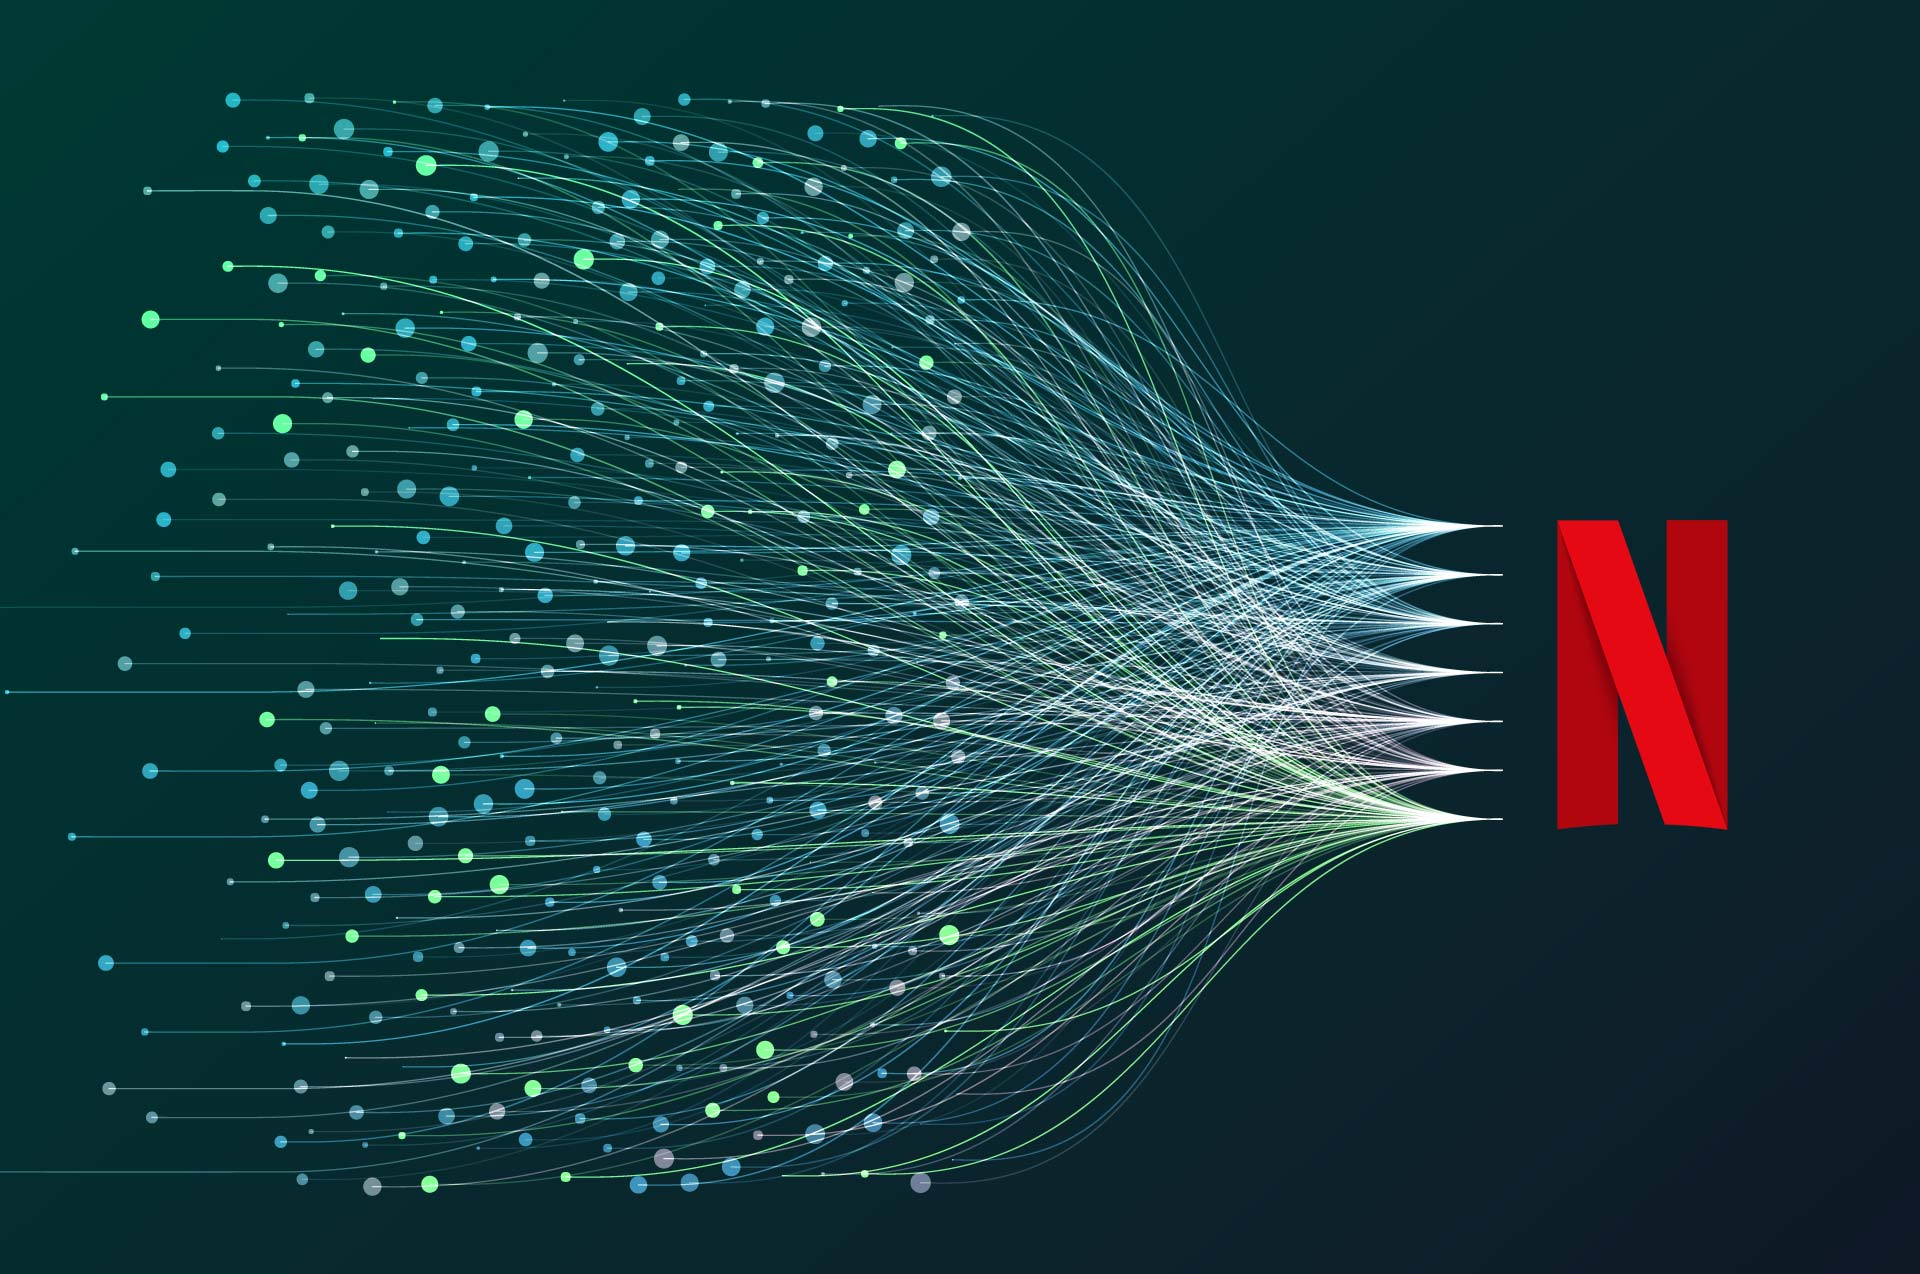

The task is to do cluster analysis on a Netflix dataset to find trends and group related things together. The dataset includes numerous information such as descriptions, actors, directors, kind, and nations, among others. The objective is to discover movie clusters based on these characteristics, enabling personalised recommendations, targeted marketing, and content classification. The research seeks to give useful insights about movie linkages and to allow data-driven decision-making in the field of entertainment.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly as px
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import missingno as miss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
!pip install contractions
import contractions
from os import path
from PIL import Image
from collections import Counter
from nltk.corpus import stopwords
from datetime import datetime
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone project/Netflix movies and TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(filepath)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

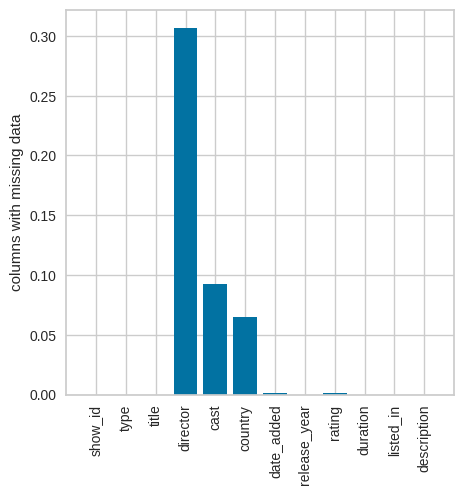

In [ ]:
# Visualizing the missing values
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(5,5))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('columns with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<Axes: >

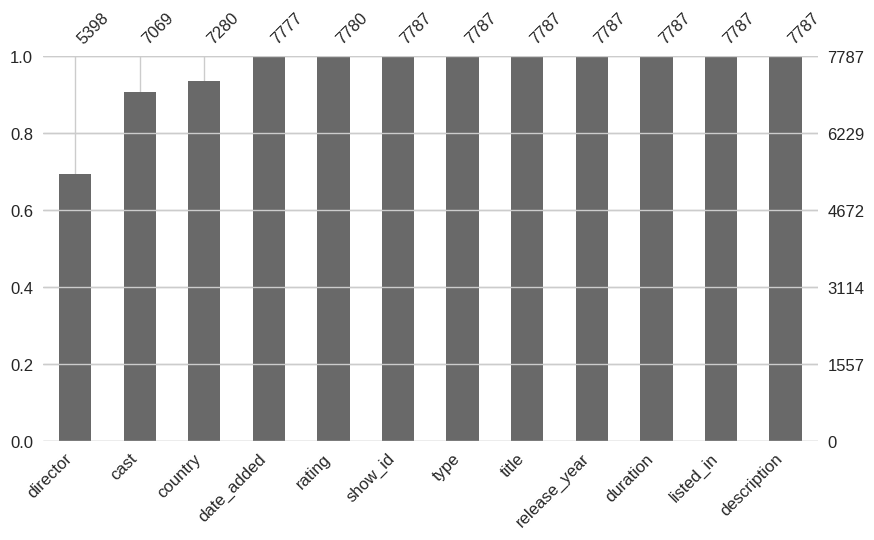

In [ ]:
# null value distribution
msno.bar(df, log=False, sort='ascending', figsize=(10,5), fontsize=12)

### What did you know about your dataset?

1. This dataset contains descriptions of Netflix TV episodes, movies, and web series.

2. There are 7787 rows and 12 columns.

3. There are 11 categorical columns and 1 numerical column.

4. There are no duplicate values present in dataset.

5. Null values are present in director, cast, country, date_added, and rating; because date_added and rating have very few null values, we will delete them from the data.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

1. show_id : Unique ID for every Movie / Tv Show
2. type : Identifier - A Movie or TV Show
3. title : Title of the Movie / Tv Show
4. director : Director of the Movie
5. cast : Actors involved in the movie / show
6. country : Country where the movie / show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Releaseyear of the movie / show
9. rating : TV Rating of the movie / show
10. duration : Total Duration - in minutes or number of seasons
11. listed_in : Genre
12. description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  uni_value = df[i].nunique()
  print(f"No. of unique values in ",i,"is",uni_value,".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## **3. Data Wrangling**

In [ ]:
# Let's tackle the missing values.

# Number of null values in date_added.
df.date_added.isnull().sum()

10

In [ ]:
# Remove null values in date_added.
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Number of null values in rating.
df.rating.isnull().sum()

7

In [ ]:
# Remove null values in rating.
df.dropna(subset=['rating'], inplace=True)

In [ ]:
# Check the shape of our data.
df.shape

(7770, 12)

**Handling missing data in the director, cast, and country columns**

In [ ]:
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We handled every missing value in the dataset successfully.


### What all manipulations have you done and insights you found?

First, we removed null values from the date_added and rating columns.Then,in the columns director, cast, and nation null values were replaced by 'unknown'. The dataset now contains no missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Type: Movie and TV Shows**

In [ ]:
Type=df['type'].value_counts()

Text(0, 0.5, 'Number of release.')

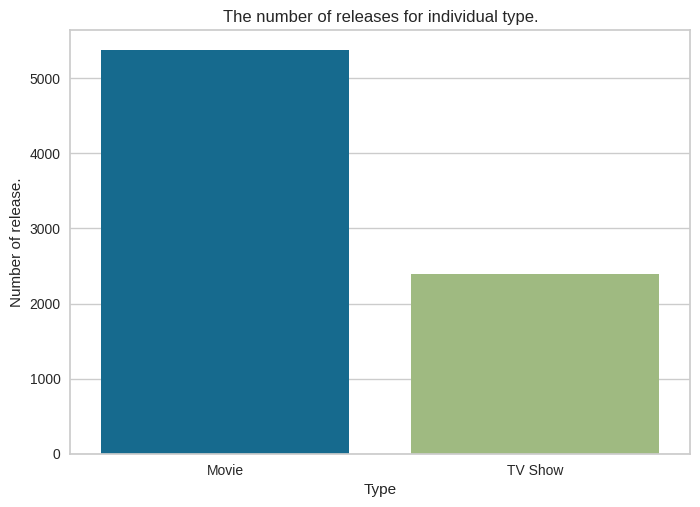

In [ ]:
sns.barplot(x=Type.index , y=Type)
plt.title('The number of releases for individual type.')
plt.xlabel('Type')
plt.ylabel('Number of release.')


##### 1. Why did you pick the specific chart?

Bar graphs provide a visual representation of data. They are used to show the relationship between two or more different types of data visually. To make the large amount of information easier to interpret visually, it is summarized in a bar graph. It offers a more detailed explanation of the patterns of the data than the table. It helps in quickly estimating the important values.

##### 2. What is/are the insight(s) found from the chart?

The quantity of movie releases exceeds the number of television shows released on Netflix.

## **Title**

**We will create a wordcloud to see which words appear the most in the titles for movies and tv shows.**

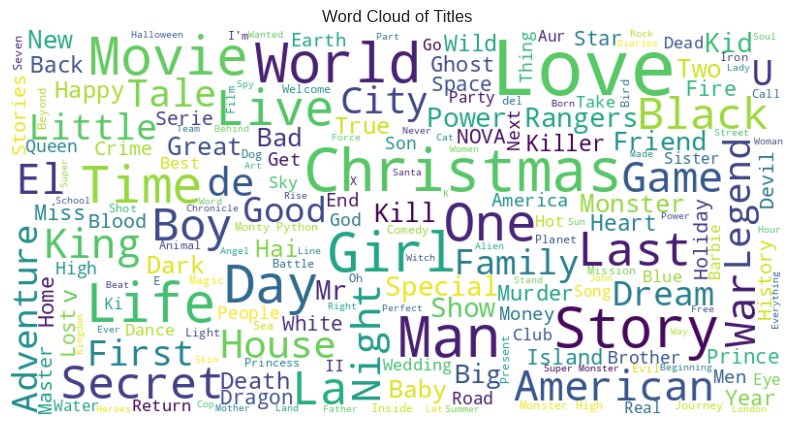

In [ ]:
# Load stopwords corpus
stopwords = set(stopwords.words('english'))

# Concatenate all titles into a single string
text = ' '.join(df['title'].astype(str))

# Create a word cloud object with custom settings
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=80,
    width=800,
    height=400,
    random_state=42
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()


##### 1. Why did you pick the specific chart?

Word Clouds are graphic representations of words that highlight the terms that occur more frequently. When utilising the Mentimeter word cloud generator, the most commonly entered words by audience members will grow in size dynamically. This form of visualisation can assist presenters in rapidly gathering data from their audience, highlighting the most popular responses, and presenting the data in a fashion that everyone can easily understand.

##### 2. What is/are the insight(s) found from the chart?

1. The most often repeated terms in the title are Christmas, Love, World, Man, and Story.
2. We noticed that the majority of the films and television series were added over the winter, which explains why Christmas featured so frequently in the names.

## **Director**

**We are going to look at which filmmakers have produced the most films and television programs**.

In [ ]:
df.director.nunique()

4048

In [ ]:
# Count the number of unique directors for movies
movie_directors = df[df['type'] == 'Movie']['director'].nunique()

# Count the number of unique directors for TV shows
tv_show_directors = df[df['type'] == 'TV Show']['director'].nunique()

# Print the results
print("Number of directors for movies:", movie_directors)
print("Number of directors for TV shows:", tv_show_directors)

Number of directors for movies: 3908
Number of directors for TV shows: 178


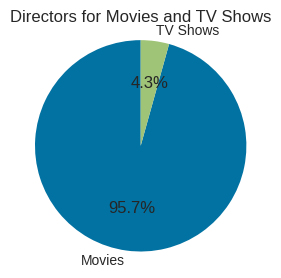

In [ ]:
# Assuming you have the number of directors for movies and TV shows
num_movie_directors = 3909
num_tv_show_directors = 177

# Create data for the pie chart
labels = ['Movies', 'TV Shows']
sizes = [num_movie_directors, num_tv_show_directors]

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Directors for Movies and TV Shows')

# Display the pie chart
plt.show()


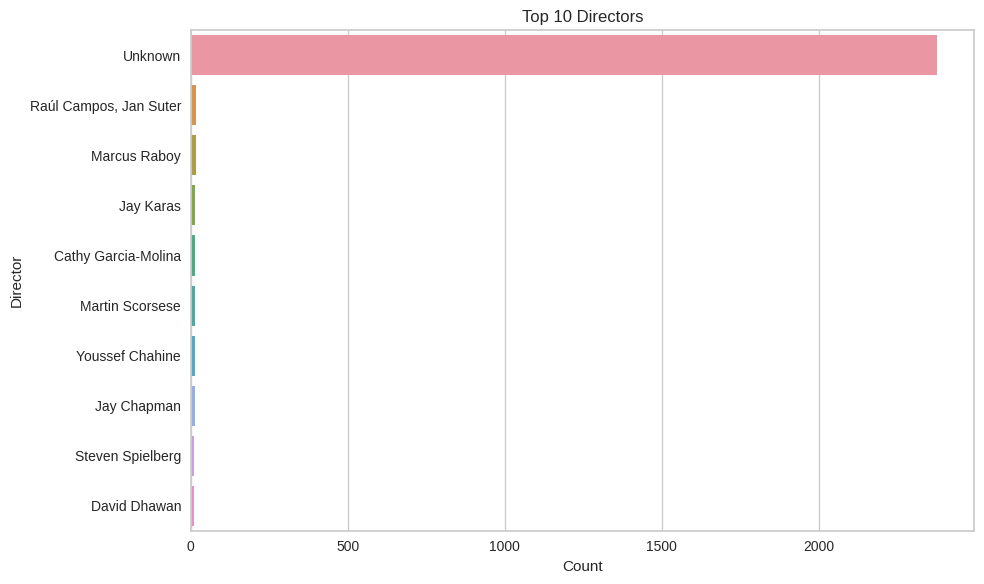

In [ ]:
# Count the number of occurrences of each director
director_counts = df['director'].value_counts().head(10)

# Plot the bar plot with horizontal bars
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. A pie chart depicts the portion relationship of your data. The area covered in a circle with different colours makes it easy to see how the percentages compare.

2. A bar graph is a data representation technique that uses rectangular bars to represent data. It enables data comparison and analysis.

##### 2. What is/are the insight(s) found from the chart?

1. There are 4050 number of directors.

2. There are 178 directors of TV shows and 3910 directors of movies.

3. Only 4.3% of directors are associated with TV shows, whereas 95.7% are associated with films.

4. Leading directors include Jay Karas, Marcus Raboy, Jan Suter, and Raul Campus.
5. Jan Suter and Raul Campos have each directed 18 films or TV episodes, which is more than any other director in the dataset.

## **Cast**

**Let's see who has appeared in the most movies or TV shows.**

In [ ]:
df.cast.nunique()

6818

In [ ]:
df['cast'].isnull().sum()

0

In [ ]:
def to_list(df):
    cast_list = [str(cast).split(",") for cast in df['cast']]
    cast_count = Counter([actor.strip() for sublist in cast_list for actor in sublist])
    return cast_count


In [ ]:
# Call the convert_to_list function on the DataFrame
actors_count = to_list(df)

# Create a new DataFrame from the actors count dictionary
actors_df = pd.DataFrame.from_dict(actors_count, orient='index', columns=['Count'])
actors_df.index.name = 'Actor'
actors_df = actors_df.sort_values(by='Count', ascending=False)



In [ ]:
actors_df

,Count
Actor,
Unknown,718
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
...,...
Mylene Dizon,1
Lorenz Martinez,1
Art Acuña,1


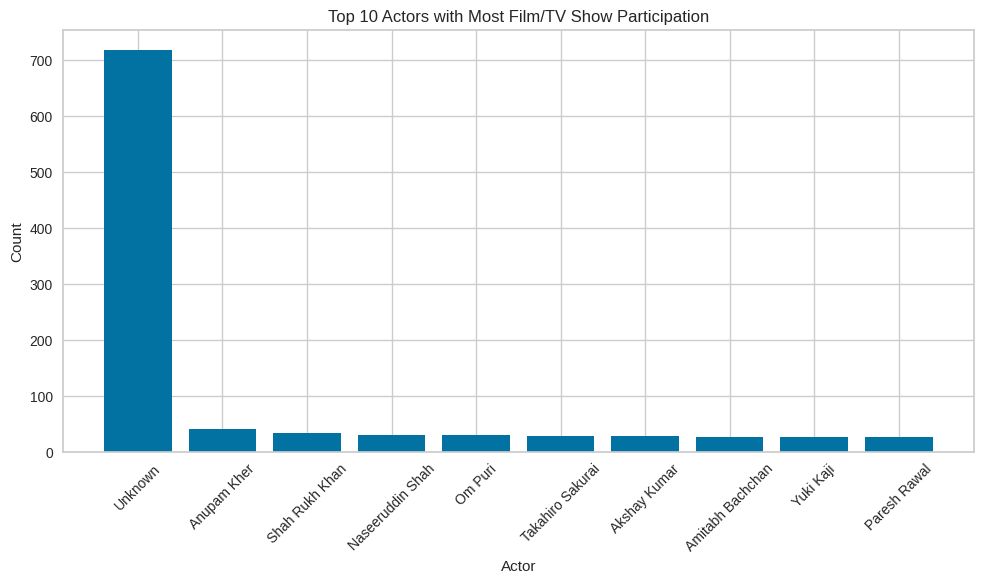

In [ ]:
# Get the top 10 actors with the highest counts
top_actors = actors_df.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_actors.index, top_actors['Count'])
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 10 Actors with Most Film/TV Show Participation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph is a type of data visualization tool that uses rectangular bars to depict data. It allows for data comparison and analysis. The bar chart depicts the top 10 actors who appear in the majority of films and television series.

##### 2. What is/are the insight(s) found from the chart?

1. There are 6831 actors who participate in the movies or TV Shows.

2. There are 718 missing values present in this columns.

3. According to our chart, the most frequently featured actors are Anupam Kher, Shahrukh Khan, and Om Puri.



## **Country**

In [ ]:
# Top countries
df.country.value_counts()

United States                                                   2546
India                                                            923
Unknown                                                          505
United Kingdom                                                   396
Japan                                                            224
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

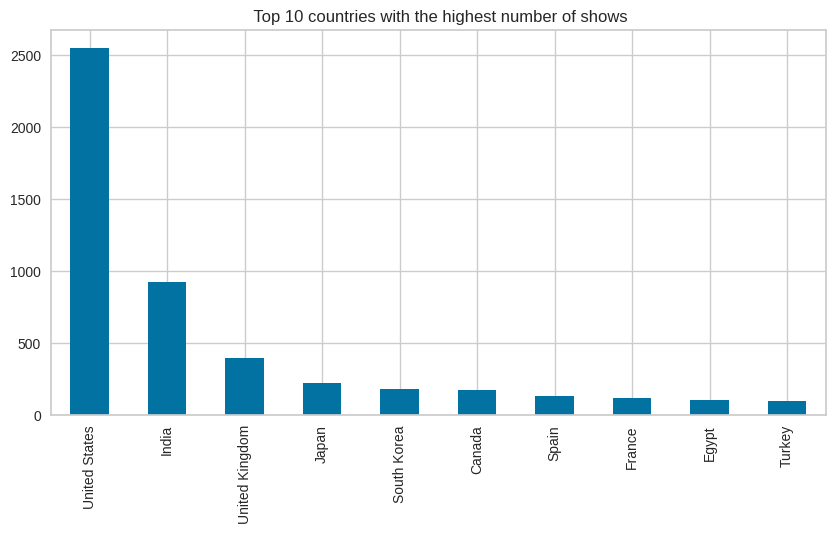

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of shows')

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

51.14543114543114

In [ ]:
df['country'].nunique()

682

In [ ]:
def group_actors_by_country(df):
    # Assuming you have a DataFrame named 'df' with columns 'cast' and 'country'

    actors_by_country = {}

    for index, row in df.iterrows():
        cast = str(row['cast']).split(",")
        country = row['country']

        for actor in cast:
            actor = actor.strip()
            if actor:
                actors_by_country.setdefault(country, []).append(actor)

    return actors_by_country


In [ ]:
actors_by_country_df = group_actors_by_country(df) # grouped Actors according to Country
print(actors_by_country_df)

{'Brazil': ['João Miguel', 'Bianca Comparato', 'Michel Gomes', 'Rodolfo Valente', 'Vaneza Oliveira', 'Rafael Lozano', 'Viviane Porto', 'Mel Fronckowiak', 'Sergio Mamberti', 'Zezé Motta', 'Celso Frateschi', 'Unknown', 'Gloria Groove', 'Alexia Twister', 'Afonso Padilha', 'Loo Nascimento', 'Ingrid Silva', 'Rincon Sapiência', 'Batekoo', 'Gabriel Martins', 'Benjamin Abras', 'Daniele DaMata', 'Tasha & Tracie Okereke', 'Mariana de Matos', 'André Novais', 'Mahal Pita', 'Grace Passô', 'Thamyra Thâmara', 'Xenia França', 'Criola', 'Dani Ornellas', 'Anelis Assumpção', 'Magá Moura', 'Tássia Reis', 'Liniker', 'Yasmin Thayná', 'Raquel Virgínia', 'Juliana Luna', 'Erica Malunguinho', 'Diane Lima', 'Karol Conká', 'Anne Celestino Mota', 'Emmanuel Rosset', 'Matheus Moura', 'Surya Amitrano', 'Thaís Schier', 'Cida Rolim', 'Katia Horn', 'Igor Augustho', 'Marcel Szymanski', 'Johnny Massaro', 'Bianca Comparato', 'Regina Braga', 'Maria Laura Nogueira', 'Victor Mendes', 'Thiago Amaral', 'Rafael Primot', 'Eduardo

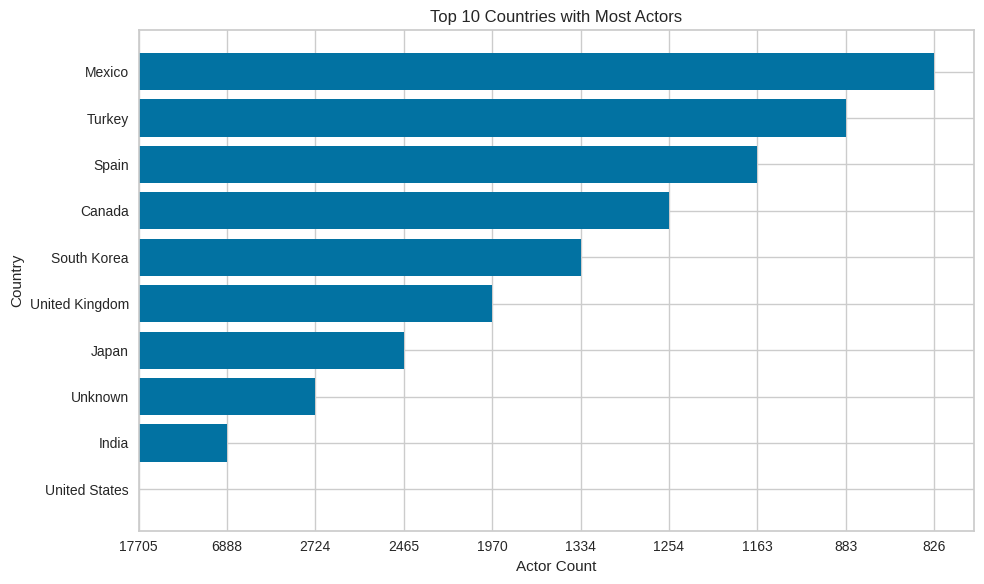

In [ ]:
def plot_actors_by_country(actors_by_country_dict):
    # Sort the dictionary by the number of actors in each country in descending order
    sorted_countries = sorted(actors_by_country_dict.keys(), key=lambda x: len(actors_by_country_dict[x]), reverse=True)

    # Get the top 10 countries with the most actors and their corresponding actor counts
    top_countries = sorted_countries[:10]
    actor_counts = [len(actors_by_country_dict[country]) for country in top_countries]

    # Sort the top countries and actor counts together
    top_countries, actor_counts = zip(*sorted(zip(top_countries, actor_counts), key=lambda x: x[1], reverse=True))

    # Convert country names and actor counts to strings
    top_countries = [str(country) for country in top_countries]
    actor_counts = [str(count) for count in actor_counts]

    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_countries, actor_counts)
    plt.xlabel('Actor Count')
    plt.ylabel('Country')
    plt.title('Top 10 Countries with Most Actors')
    plt.tight_layout()
    plt.show()

plot_actors_by_country(actors_by_country_df)


##### 1. Why did you pick the specific chart?

A type of data visualization tool called a bar graph utilises rectangular bars to represent data. It enables the examination and comparison of data.  Here, it shows a visualization of the content that every country produces and the number of performers from each country.

##### 2. What is/are the insight(s) found from the chart?

1. There are 681 countries.
2. The United States has the most TV shows and movie programs in the dataset. followed by India and the United Kingdom respectively.
3. 51% of total content is produced by US, India and UK.
4. Maximum number of actors are from Maxico.

## **date_added**

In [ ]:
df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7770, dtype: object

In [ ]:
df['date_added'].unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [ ]:
def count_films_by_year(df):
    # Convert the added_date column to datetime format
    df['date_added'] = pd.to_datetime(df['date_added'])

    # Extract the year from the added_date and create a new column
    df['year'] = df['date_added'].dt.year

    # Count the occurrences of each year
    films_by_year = df['year'].value_counts().sort_index().to_dict()

    return films_by_year


In [ ]:
films_by_year = count_films_by_year(df) # count the number of releases per year
print(films_by_year)

{2008: 2, 2009: 2, 2010: 1, 2011: 13, 2012: 3, 2013: 11, 2014: 25, 2015: 88, 2016: 440, 2017: 1222, 2018: 1684, 2019: 2153, 2020: 2009, 2021: 117}


In [ ]:
# Convert the date_added column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year from the date_added and create a new column
df['year'] = df['date_added'].dt.year

# Count the occurrences of each year
year_counts = df['year'].value_counts().sort_index()

# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(x=year_counts.index, y=year_counts.values))
fig.update_layout(title='Number of Movies and TV Shows Added to Netflix per Year',
                  xaxis_title='Year', yaxis_title='Number of Movies and TV Shows')
fig.show()


In [ ]:
# Convert the date_added column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the month from the date_added and create a new column
df['month_added'] = df['date_added'].dt.month

# Count the occurrences of each month
month_counts = df['month_added'].value_counts().sort_index()

# Map month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_labels = [month_names[int(i) - 1] for i in month_counts.index]

# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(x=month_labels, y=month_counts.values))
fig.update_layout(title='Number of Movies Added to Netflix by Month',
                  xaxis_title='Month', yaxis_title='Number of Movies Added')
fig.show()


##### 1. Why did you pick the specific chart?

Plotly visualizations provide effective visualization of categorical data, easy comparison, interactive features, customization options, integration with other visualizations, and sharing and embedding capabilities for a cohesive data exploration experience. above plots shows number of added movie or tv shows according to year and second highest added movies or tv shows in which month.

##### 2. What is/are the insight(s) found from the chart?

1. Data is showing releases between 2008 to 2021.
2. In 2019, the most content was added.
3. Maximum number of  movies and tv shows were released in the month of December.

## **release_year**

In [ ]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
def count_films_by_year(df):
    films_by_year = df['release_year'].value_counts().sort_index().to_dict()
    return films_by_year

In [ ]:
films_by_year_dict = count_films_by_year(df)
films_by_year_dict

{1925: 1,
 1942: 2,
 1943: 3,
 1944: 3,
 1945: 3,
 1946: 2,
 1947: 1,
 1954: 2,
 1955: 3,
 1956: 2,
 1958: 3,
 1959: 1,
 1960: 4,
 1962: 3,
 1963: 2,
 1964: 1,
 1965: 2,
 1966: 1,
 1967: 5,
 1968: 5,
 1969: 2,
 1970: 2,
 1971: 5,
 1972: 4,
 1973: 10,
 1974: 7,
 1975: 6,
 1976: 9,
 1977: 7,
 1978: 6,
 1979: 11,
 1980: 9,
 1981: 9,
 1982: 15,
 1983: 9,
 1984: 9,
 1985: 9,
 1986: 10,
 1987: 7,
 1988: 16,
 1989: 13,
 1990: 20,
 1991: 17,
 1992: 18,
 1993: 22,
 1994: 16,
 1995: 19,
 1996: 19,
 1997: 30,
 1998: 31,
 1999: 33,
 2000: 34,
 2001: 36,
 2002: 45,
 2003: 47,
 2004: 59,
 2005: 73,
 2006: 85,
 2007: 85,
 2008: 124,
 2009: 137,
 2010: 171,
 2011: 166,
 2012: 218,
 2013: 265,
 2014: 334,
 2015: 536,
 2016: 881,
 2017: 1010,
 2018: 1120,
 2019: 996,
 2020: 868,
 2021: 31}

In [ ]:
def plot_films_by_year(films_by_year_dict):
    years = list(films_by_year_dict.keys())
    counts = list(films_by_year_dict.values())

    fig = go.Figure(data=go.Bar(x=years, y=counts))
    fig.update_layout(title='Number of Films Released by Year', xaxis_title='Year', yaxis_title='Count')
    fig.show()


In [ ]:
plot_films_by_year(films_by_year_dict)